In [3]:
"""Load Data Set"""
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

data = load_iris() #shift+tab

diris = pd.DataFrame()
diris['sepal length'] = data['data'][:,0]
diris['sepal width'] = data['data'][:,1]
diris['petal length'] = data['data'][:,2]
diris['petal width'] = data['data'][:,3]

display(diris) # Verifiy Data 

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# Defining Training Data for Dataset
X = diris.loc[:, 'sepal length']
y = diris.loc[:, 'petal length']
display(X)
display(y)

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length, Length: 150, dtype: float64

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal length, Length: 150, dtype: float64

In [5]:
#define keras model
model = Sequential()

model.add(Dense(10,input_dim=1,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu')) # Add more layers
model.add(Dense(10,activation='relu')) # Add more layers
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)

#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000, batch_size = 10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize all cases
for i in range(149):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )

C:\Users\calvi\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,415 (5.53 KB)

 Trainable params: 471 (1.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 944 (3.69 KB)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
5.1 => 1.92 (expected 1.40)
4.9 => 1.77 (expected 1.40)
4.7 => 1.59 (expected 1.30)
4.6 => 1.49 (expected 1.50)
5.0 => 1.84 (expected 1.40)
5.4 => 2.34 (expected 1.70)
4.6 => 1.49 (expected 1.40)
5.0 => 1.84 (expected 1.50)
4.4 => 1.28 (expected 1.40)
4.9 => 1.77 (expected 1.50)
5.4 => 2.34 (expected 1.50)
4.8 => 1.69 (expected 1.60)
4.8 => 1.69 (expected 1.40)
4.3 => 1.18 (expected 1.10)
5.8 => 4.18 (expected 1.20)
5.7 => 3.94 (expected 1.50)
5.4 => 2.34 (expected 1.30)
5.1 => 1.92 (expected 1.40)
5.7 => 3.94 (expected 1.70)
5.1 => 1.92 (expected 1.50)
5.4 => 2.34 (expected 1.70)
5.1 => 1.92 (expected 1.50)
4.6 => 1.49 (expected 1.00)
5.1 => 1.92 (expected 1.70)
4.8 => 1.69 (expected 1.90)
5.0 => 1.84 (expected 1.60)
5.0 => 1.84 (expected 1.60)
5.2 => 1.99 (expected 1.50)
5.2 => 1.99 (expected 1.40)
4.7 => 1.59 (expected 1.60)
4.8 => 1.69 (expected 1.60)
5.4 => 2.34 (expected 1.50)
5.2 => 1.99 (expected 1.50)
5.5 => 3.14 (expected 1.40)
4.9 => 1.7

C:\Users\calvi\AppData\Local\Temp\ipykernel_5360\1831398922.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


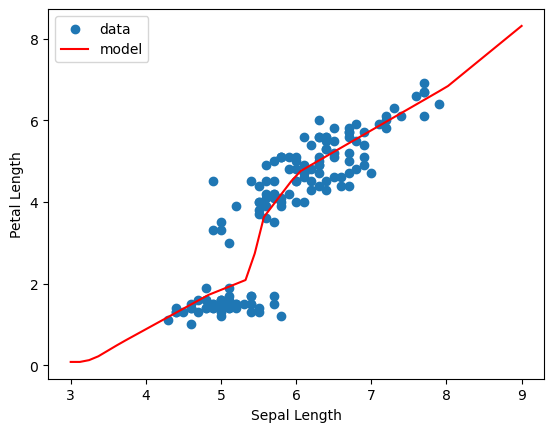

In [6]:
import matplotlib.pyplot as plt
number_grid = np.linspace(3, 9)
plt.scatter(X,y, label='data')
plt.plot(number_grid,model.predict(np.expand_dims(number_grid,axis=1)) , color='red', label='model')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()